In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load and preprocess the image
def load_and_preprocess_image(image_path, scale_factor=0.02):
    # Open the image using PIL and disable the decompression bomb check
    Image.MAX_IMAGE_PIXELS = None
    image = Image.open(image_path)
    
    # Rescale the image
    new_size = (int(image.size[0] * scale_factor), int(image.size[1] * scale_factor))
    image_rescaled = image.resize(new_size, Image.LANCZOS)
    
    # Convert the image to a NumPy array and normalize to [0, 1]
    image_rescaled = np.array(image_rescaled) / 255.0
    
    return image_rescaled

# Display the image
def display_image(image, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

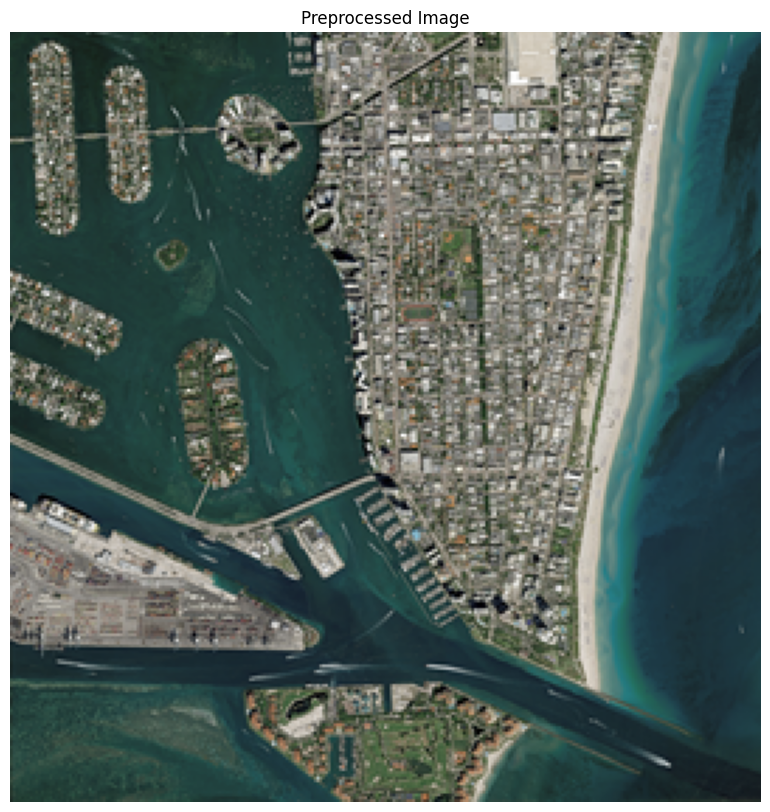

In [20]:
# Path to the image
image_path = "../satellite-images/Miami.jpg"

# Load and preprocess the image
preprocessed_image = load_and_preprocess_image(image_path, scale_factor=0.01)

# Display the preprocessed image
display_image(preprocessed_image, title='Preprocessed Image')

In [21]:
from sklearn.cluster import OPTICS
import time

def apply_optics_clustering(image, min_samples=5, max_eps=np.inf, cluster_method='xi', xi=0.05, randomly_sample=True, sample_fraction=0.1):
    # Flatten the image to a 2D array of pixels
    pixels = image.reshape(-1, image.shape[2])

    if randomly_sample:
        # Randomly sample pixels
        np.random.seed(0)
        sample_indices = np.random.choice(pixels.shape[0], size=int(sample_fraction * pixels.shape[0]), replace=False)
        sample_pixels = pixels[sample_indices]
        
        optics = OPTICS(min_samples=min_samples, max_eps=max_eps, cluster_method=cluster_method, xi=xi)
        labels = optics.fit_predict(sample_pixels)
        
        full_labels = -np.ones(pixels.shape[0])
        full_labels[sample_indices] = labels
    else:
        optics = OPTICS(min_samples=min_samples, max_eps=max_eps, cluster_method=cluster_method, xi=xi)
        labels = optics.fit_predict(pixels)

    clustered_image = labels.reshape(image.shape[0], image.shape[1])
    
    return clustered_image

/Users/jcbob/Documents/repositories/gitlab/ro2/rozpoznawanie_obrazow_2/ro-venv/lib/python3.11/site-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


time elapsed during function: 78.32346415519714


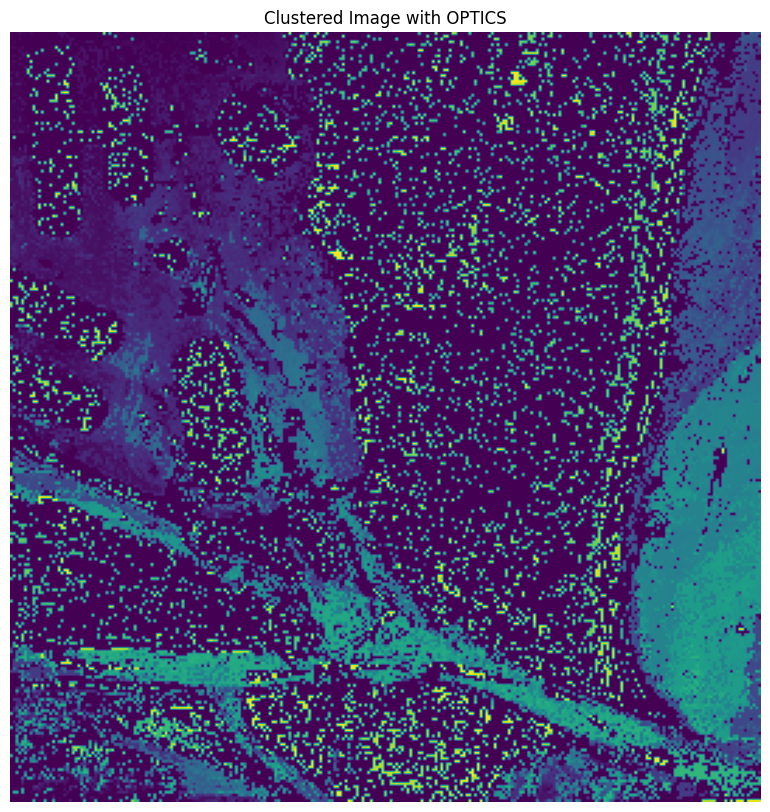

In [22]:
# Apply OPTICS clustering to the preprocessed image
randomly_sample = False
sample_fraction = 0.2

min_samples = 5
max_eps = 0.5
cluster_method = 'xi'
xi = 0.05

start_time = time.time()
clustered_image_optics = apply_optics_clustering(preprocessed_image, 
                                                 min_samples,
                                                 max_eps,
                                                 cluster_method,
                                                 xi,
                                                 randomly_sample,
                                                 sample_fraction
                                                )
end_time = time.time()
print(f"time elapsed during function: {end_time - start_time}")

# Display the clustered image
display_image(clustered_image_optics, title='Clustered Image with OPTICS')

In [23]:
print(f"time elapsed during function: {end_time - start_time}")

time elapsed during function: 78.32346415519714
